In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("seaborn")

In [2]:
raw_data = pd.read_csv("fashion-mnist_train.csv")

In [3]:
raw_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Label information
    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

In [4]:
#Plots an image
def plot_image(df, index):
    pic = df.iloc[index].drop(['label'])
    pic = pic.to_numpy()
    pic = pic.reshape(28,28)
    plt.imshow(pic, interpolation = "nearest")

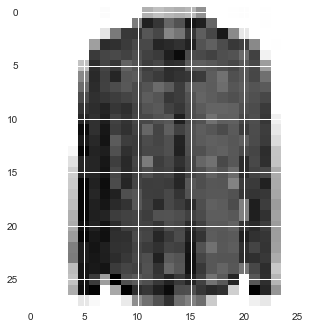

In [5]:
plot_image(raw_data, 2)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
raw_data['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

## KNN Classifier

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X = raw_data.drop("label", axis=1).values

In [14]:
y = raw_data['label'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [17]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

## KNN is a bad choice because there are too many variables for the model to base a label on. KNN classifier is a bad model for this data-set

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [19]:
decision_tree_model = DecisionTreeClassifier()

In [20]:
#The training process takes a while
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
print("The number of leaf nodes in the model:",decision_tree_model.get_n_leaves())

The number of leaf nodes in the model: 4531


In [22]:
print("The depth of the tree in the model:",decision_tree_model.get_depth())

The depth of the tree in the model: 49


In [23]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [24]:
print("Decision tree model score:",decision_tree_model.score(X_test, y_test))

Decision tree model score: 0.8025


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
#Cross-validating five times(Any more then that is too slow)
cross_val_score(decision_tree_model, X_train, y_train, cv=5)

array([0.78324074, 0.78888889, 0.79583333, 0.7912037 , 0.79361111])

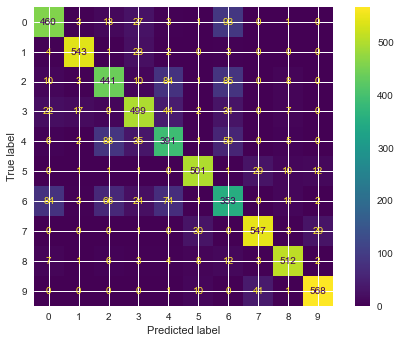

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test)

## Decision tree gives a decent score of around 80, yet it isn't high enough to justify it being a good model for our problem

## Linear SVC

In [32]:
from sklearn.svm import LinearSVC

In [33]:
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)

C:\Users\eliko\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [34]:
svc_model.score(X_test, y_test)

0.8003333333333333

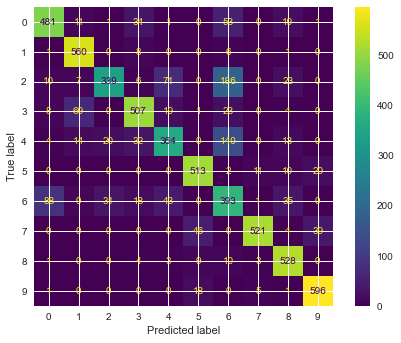

In [35]:
confusion_matrix = ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test)

## ADA boost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
ada_classifier = AdaBoostClassifier(n_estimators = 100, random_state = 42)

In [38]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [39]:
ada_classifier.score(X_test, y_test)

0.5596666666666666